In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('/content/Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
data.shape

(400, 3)

Extract Features and Target

In [4]:
Y=data['Purchased']
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [5]:
X=data.drop('Purchased',axis=1)
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


Visualization

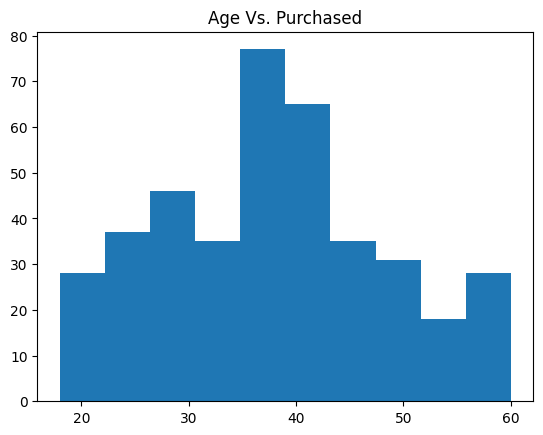

In [6]:
plt.hist(X['Age'],bins=10)
plt.title("Age Vs. Purchased")
plt.show()

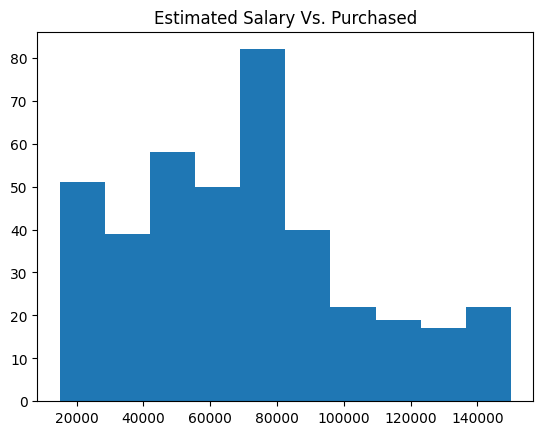

In [7]:
plt.hist(X['EstimatedSalary'],bins=10)
plt.title("Estimated Salary Vs. Purchased")
plt.show()

Splitting The Dataset

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=5)

In [9]:
X_train

,Age,EstimatedSalary
24,46,23000
33,28,44000
396,51,23000
273,39,106000
246,35,50000
...,...,...
73,33,113000
118,40,59000
189,28,32000
206,55,130000


In [10]:
Y_train

24     1
33     0
396    1
273    1
246    0
      ..
73     0
118    0
189    0
206    1
355    1
Name: Purchased, Length: 300, dtype: int64

In [11]:
X_test

,Age,EstimatedSalary
218,46,96000
191,19,26000
117,36,52000
50,24,32000
348,39,77000
...,...,...
368,38,71000
89,35,50000
182,32,117000
219,59,143000


In [12]:
Y_test

218    0
191    0
117    0
50     0
348    0
      ..
368    0
89     0
182    1
219    1
18     1
Name: Purchased, Length: 100, dtype: int64

Normalization

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
Sc=StandardScaler()

In [15]:
Sc.fit(X_train)
X_tr=Sc.transform(X_train)
X_tr

array([[ 0.77063564, -1.37090753],
       [-0.95681661, -0.74731782],
       [ 1.25048349, -1.37090753],
       [ 0.09884866,  1.09375655],
       [-0.28502962, -0.56914934],
       [-1.14875575,  0.49986159],
       [-1.05278618,  0.44047209],
       [-1.14875575,  0.3216931 ],
       [ 1.5383922 ,  1.15314605],
       [-0.95681661, -0.3018966 ],
       [ 2.01824005, -0.80670732],
       [ 0.09884866, -0.80670732],
       [ 2.01824005,  0.55925109],
       [ 0.86660521, -0.53945459],
       [-0.28502962,  0.11382987],
       [-0.86084704,  0.17321936],
       [ 0.2907878 , -0.27220186],
       [-0.28502962, -0.27220186],
       [ 0.38675737,  2.37063071],
       [ 1.73033134,  1.89551474],
       [ 0.19481823, -0.24250711],
       [ 1.05854435, -1.22243379],
       [-0.18906005, -0.56914934],
       [ 1.44242263,  0.3810826 ],
       [-0.28502962, -1.40060228],
       [ 0.96257478, -1.07396005],
       [ 1.82630091, -0.27220186],
       [-0.28502962,  0.55925109],
       [-1.14875575,

In [16]:
Sc.fit(X_test)
X_ts=Sc.transform(X_test)
X_ts

array([[ 0.87960747,  0.69869621],
       [-1.6768405 , -1.29513724],
       [-0.06722511, -0.55457053],
       [-1.20342421, -1.12423723],
       [ 0.21682466,  0.15751284],
       [ 0.02745814, -0.0418705 ],
       [-0.25659163, -0.81092055],
       [ 0.50087444,  0.10054617],
       [-0.16190837, -0.5260872 ],
       [ 0.50087444,  0.21447951],
       [-0.06722511,  1.52471293],
       [-1.10874095,  0.5277962 ],
       [-0.73000792,  0.32841285],
       [-0.5406414 , -0.15580384],
       [-0.16190837, -0.69698721],
       [-1.6768405 , -1.32362058],
       [-0.16190837,  2.1513463 ],
       [ 0.31150792, -0.18428718],
       [-1.01405769,  0.27144618],
       [ 0.02745814,  0.10054617],
       [ 1.06897398,  1.35381292],
       [ 0.21682466,  0.0435795 ],
       [ 2.20517308, -0.83940388],
       [ 0.40619118,  0.01509617],
       [ 0.78492421, -0.75395388],
       [-0.63532466, -1.60845393],
       [ 0.31150792, -0.41215386],
       [ 2.01580657, -0.95333722],
       [ 1.2583405 ,

In [17]:
Y_traina=np.array(Y_train)

In [18]:
Sc.fit(Y_traina.reshape(1,-1))
Y_tr=Sc.transform(Y_traina.reshape(1,-1))
Y_tr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [19]:
Y_testa=np.array(Y_test)

In [20]:
Sc.fit(Y_testa.reshape(1,-1))
Y_ts=Sc.transform(Y_testa.reshape(1,-1))
Y_ts

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

Building A Model
*   Logistic Regression



In [21]:
Log=LogisticRegression()
Log.fit(X_train,Y_train)

LogisticRegression()

In [23]:
Y_pred=Log.predict(X_test)
Log_a = accuracy_score(Y_test, Y_pred)
Log_cm = confusion_matrix(Y_test, Y_pred)
print('Logistic Regression Accuracy:',Log_a)

Logistic Regression Accuracy: 0.66


In [24]:
print('Logistic Regression Confusion Matrix:\n\n',Log_cm)
print(classification_report(Y_test,Y_pred))

Logistic Regression Confusion Matrix:

 [[66  0]
 [34  0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        66
           1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   KNN


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
Knn=KNeighborsClassifier()
Knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [29]:
y_pred=Knn.predict(X_test)

In [30]:
Knn_a = accuracy_score(Y_test, y_pred)
Knn_cm = confusion_matrix(Y_test, y_pred)
print('Logistic Regression Accuracy:',Knn_a)
print('Logistic Regression Confusion Matrix:\n\n',Knn_cm)
print(classification_report(Y_test,Y_pred))

Logistic Regression Accuracy: 0.77
Logistic Regression Confusion Matrix:

 [[58  8]
 [15 19]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        66
           1       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
